Microsoft_Stock_Price_TS

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv('Microsoft_Stock.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [42]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [43]:

df=data[['Close','Date']]


In [44]:
data['Date'].tail(60)

,Date
1451,1/5/2021 16:00:00
1452,1/6/2021 16:00:00
1453,1/7/2021 16:00:00
1454,1/8/2021 16:00:00
1455,1/11/2021 16:00:00
1456,1/12/2021 16:00:00
1457,1/13/2021 16:00:00
1458,1/14/2021 16:00:00
1459,1/15/2021 16:00:00
1460,1/19/2021 16:00:00


In [45]:
df['Date']=pd.to_datetime(df['Date'])

/tmp/ipython-input-45-3023999556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


In [46]:
df=df.set_index('Date')
df

df.index=pd.to_datetime(df.index).normalize()


In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
df

,Close
Date,
2015-04-01,40.72
2015-04-02,40.29
2015-04-06,41.55
2015-04-07,41.53
2015-04-08,41.42
...,...
2021-03-25,232.34
2021-03-26,236.48
2021-03-29,235.24


In [49]:
def test(datas):

    rolmean = datas.rolling(7).mean() # rolling mean
    rolstd = datas.rolling(7).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,5))
    plt.grid('both')

    plt.plot(datas, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)

    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.show(block=False)

    result=adfuller(datas,autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

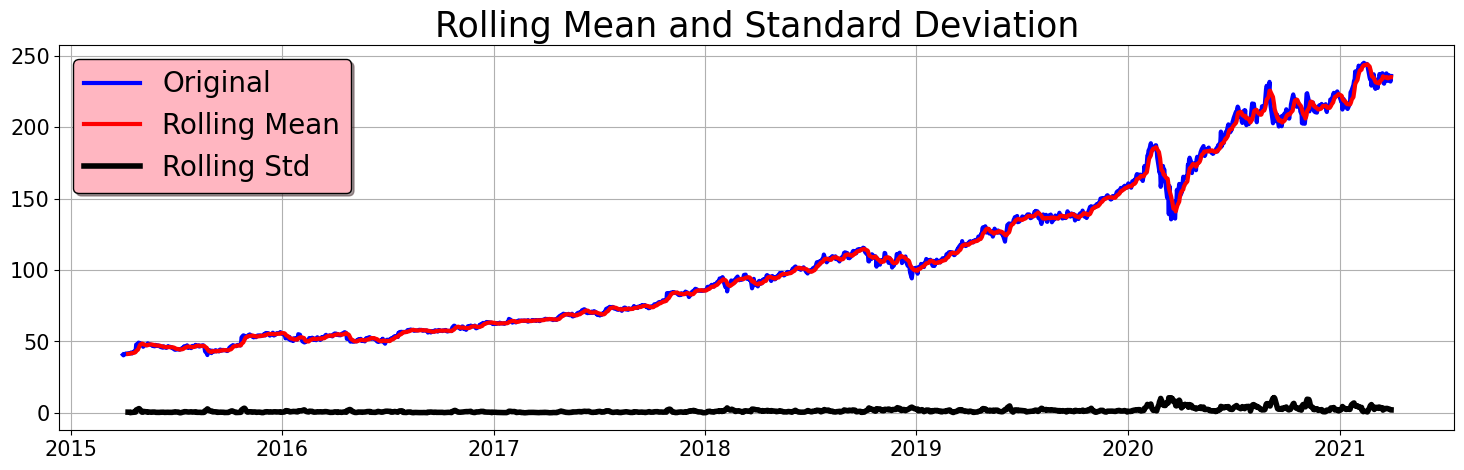

ADF Statistic: 1.7371362899270968
n_lags: 0.9982158366942122
p-value: 0.9982158366942122
Critial Values:
   1%, -3.4347582315402434
Critial Values:
   5%, -2.863486949792871
Critial Values:
   10%, -2.567806534528638


In [50]:
test(df)

<Figure size 1800x800 with 0 Axes>

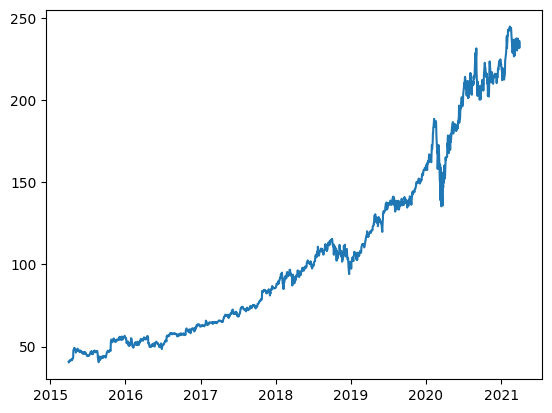

<Figure size 1800x800 with 0 Axes>

In [51]:

plt.plot(df)
plt.figure(figsize = (18,8))

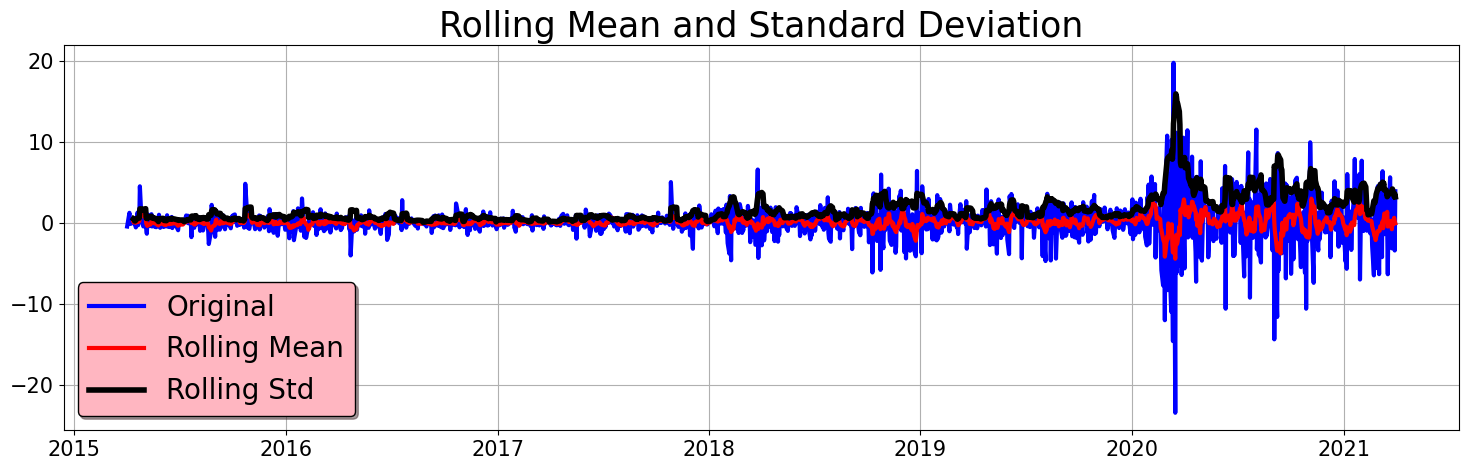

ADF Statistic: -10.038331065146398
n_lags: 1.519593991753183e-17
p-value: 1.519593991753183e-17
Critial Values:
   1%, -3.43476120520139
Critial Values:
   5%, -2.863488262178673
Critial Values:
   10%, -2.567807233388883


In [52]:
data_sale=df.diff()# lag 1
data_sale=data_sale.dropna()
test(data_sale)

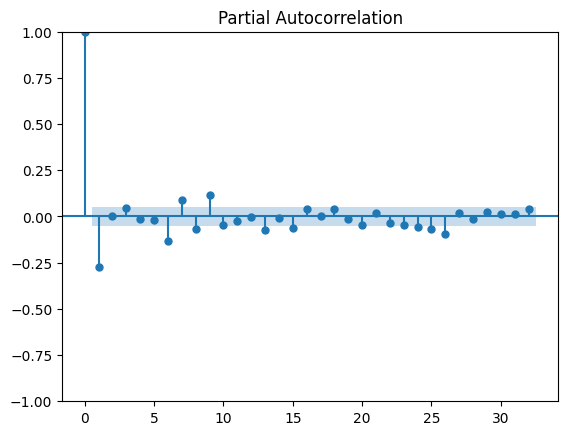

<Figure size 300x300 with 0 Axes>

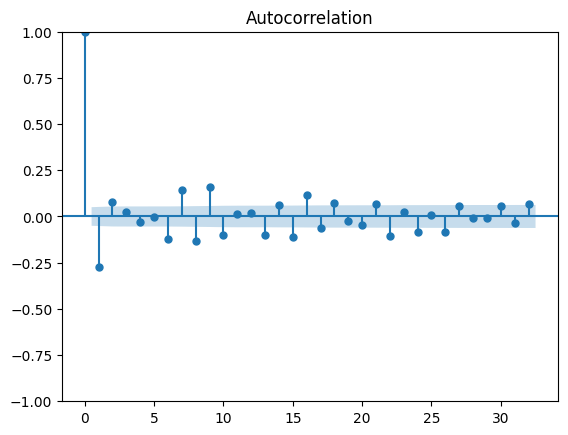

<Figure size 300x300 with 0 Axes>

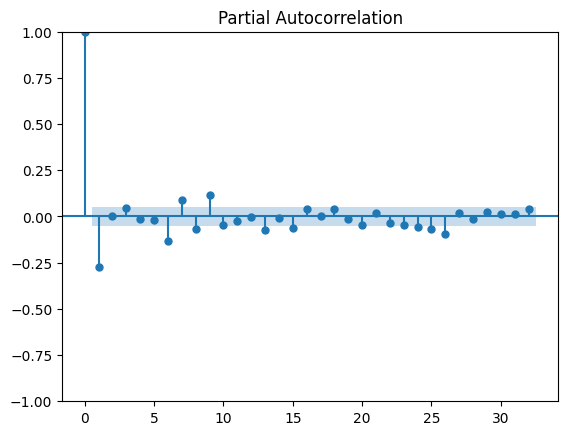

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf#to find p,q
plt.figure(figsize=(3,3))
plot_acf(data_sale)

plt.figure(figsize=(3,3))

plot_pacf(data_sale)

In [54]:
train=df.iloc[:1000]
test=df.iloc[1000:]

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [56]:
sarimax_model=SARIMAX(train,order=(1,1,1),seasonal_order=(0,1,0,7))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [57]:
#arimax_model=ARIMA(train,order=(1,1,1))

In [58]:
sarimax_fit=sarimax_model.fit()

In [59]:
sarimax_pred=sarimax_fit.predict(start=len(train),end=len(train)+len(test)-1) #test on test data

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [60]:
print("MSE:",mean_squared_error(test,sarimax_pred))
print("MAE:",mean_absolute_error(test,sarimax_pred))
print("RMSE:",np.sqrt(mean_squared_error(test,sarimax_pred)))

MSE: 1930.295639474025
MAE: 35.25927945556548
RMSE: 43.9351299016405


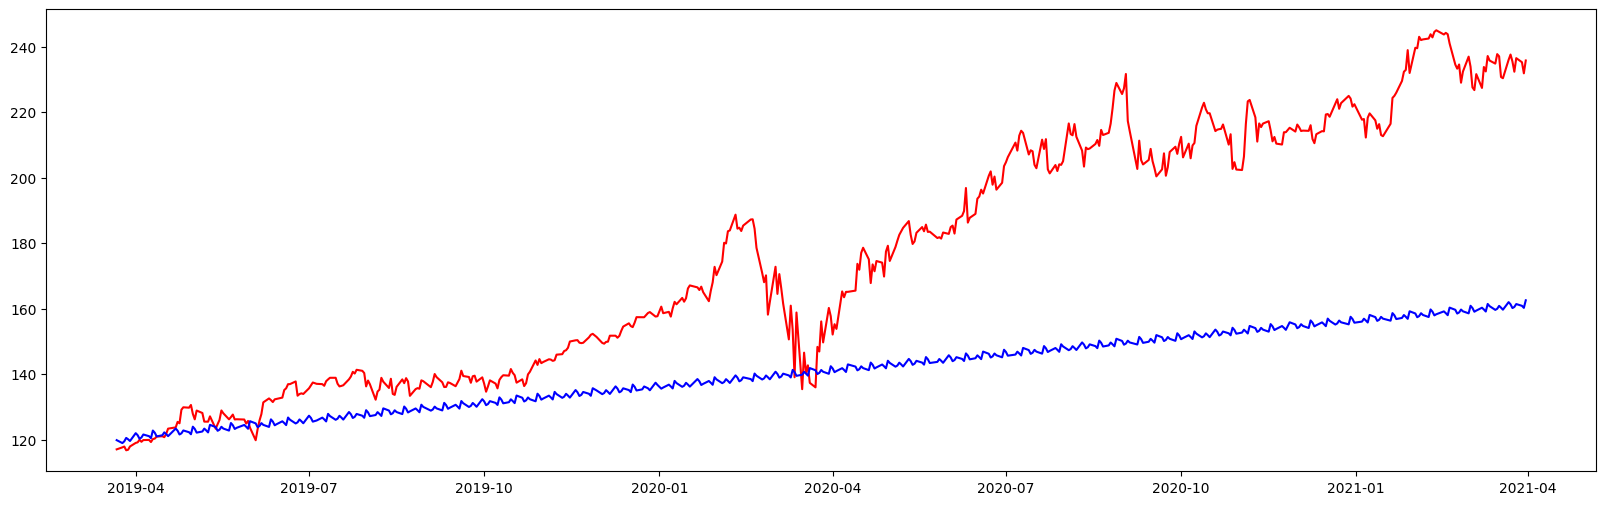

In [61]:
plt.figure(figsize=(20,6))
#plt.plot(train.index,train,label='Train')
plt.plot(test.index,test,label='Actual',color='red')
plt.plot(test.index,sarimax_pred,label='Sarimax_Prediction',color='blue')#BEST

In [107]:
forcast_sarimax_model=SARIMAX(df,order=(1,0,2),seasonal_order=(2,0,0,52))

forcast_sarimax_model_fit=forcast_sarimax_model.fit()

sarimax_forcast=forcast_sarimax_model_fit.get_forecast(steps=8)

sarimax_forcast_mean=sarimax_forcast.predicted_mean

sarimax_conf=sarimax_forcast.conf_int()

sarima_original_forecast=sarimax_forcast_mean

sarima_original_forecast.head(2)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/

,predicted_mean
1511,234.491808
1512,234.831566


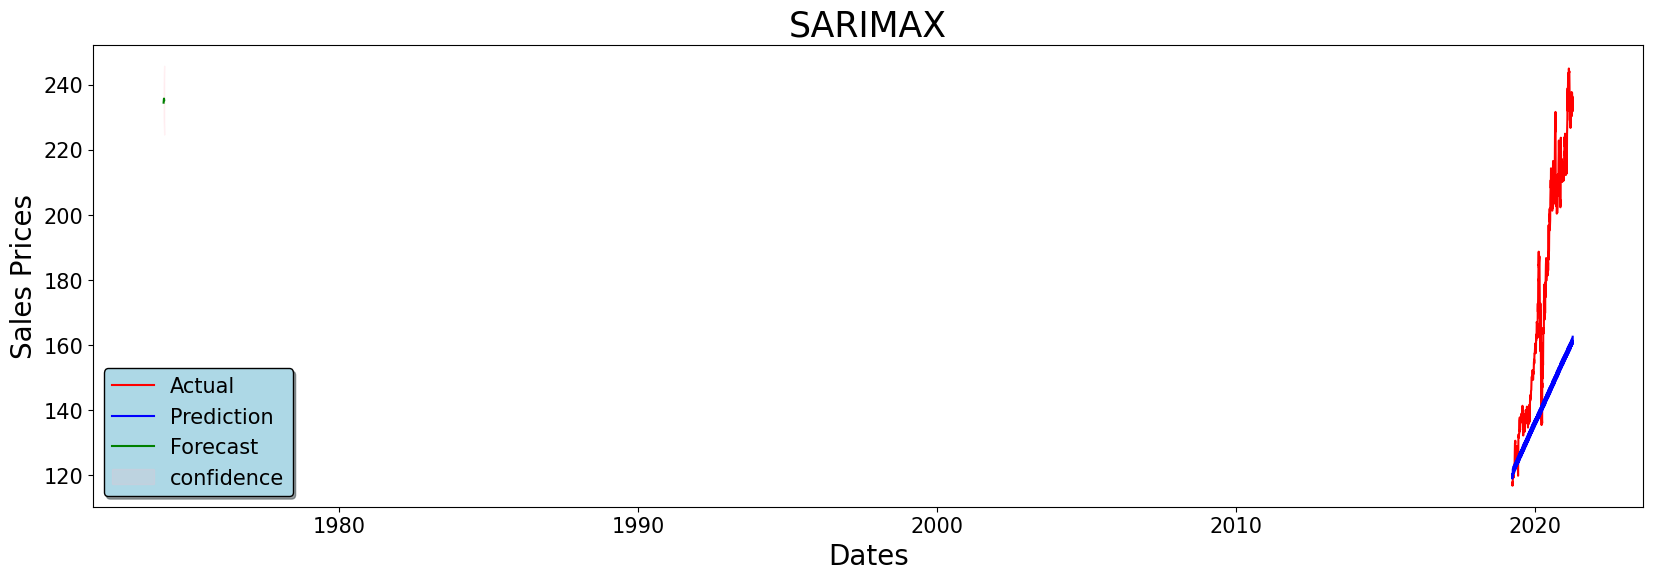

In [108]:
plt.figure(figsize=(20,6))
#plt.plot(train.index,train,label='Train')
plt.plot(test.index,test,label='Actual',color='red')

plt.plot(test.index,sarimax_pred,label='Prediction',color='blue')

plt.plot(sarimax_forcast_mean.index,sarimax_forcast_mean,label='Forecast',color='green')

plt.fill_between(sarimax_forcast_mean.index,sarimax_conf.iloc[:,0],sarimax_conf.iloc[:,1],color='pink',alpha=0.2,label='confidence')

plt.legend(loc='best', fontsize = 15, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('SARIMAX', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


In [80]:
p=data[['Date','Close']]
p['Date']=pd.to_datetime(p['Date']).dt.date

/tmp/ipython-input-80-758243444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['Date']=pd.to_datetime(p['Date']).dt.date


In [81]:
p=p.rename(columns={'Date':'ds','Close':'y'})

In [84]:
p['ds']=pd.to_datetime(p['ds'])

In [85]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1511 non-null   datetime64[ns]
 1   y       1511 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.7 KB


In [87]:
prophet_train=p.iloc[:1000]
prophet_test=p.iloc[1000:]
prophet_train.tail()

,ds,y
995,2019-03-15,115.91
996,2019-03-18,117.57
997,2019-03-19,117.65
998,2019-03-20,117.52
999,2019-03-21,120.22


Model

In [101]:
from prophet import Prophet
model_prohet=Prophet()


In [88]:

prophet_fit=model_prohet.fit(prophet_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp176wdfqv/gryh2yq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp176wdfqv/84rh_t6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83389', 'data', 'file=/tmp/tmp176wdfqv/gryh2yq2.json', 'init=/tmp/tmp176wdfqv/84rh_t6k.json', 'output', 'file=/tmp/tmp176wdfqv/prophet_modeljub9s1s3/prophet_model-20250727121958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:19:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [89]:
prohet_prediction=prophet_fit.predict(prophet_test)
prohet_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-22,112.632627,109.471601,114.899659,112.632627,112.632627,-0.567292,-0.567292,-0.567292,1.249952,1.249952,1.249952,-1.817244,-1.817244,-1.817244,0.0,0.0,0.0,112.065335
1,2019-03-25,112.781081,109.121949,114.454185,112.781081,112.781081,-1.012585,-1.012585,-1.012585,1.124385,1.124385,1.124385,-2.136970,-2.136970,-2.136970,0.0,0.0,0.0,111.768496
2,2019-03-26,112.830565,109.167540,114.500453,112.830565,112.830565,-0.979474,-0.979474,-0.979474,1.264968,1.264968,1.264968,-2.244442,-2.244442,-2.244442,0.0,0.0,0.0,111.851091
3,2019-03-27,112.880050,108.998426,114.473822,112.880050,112.880050,-1.110703,-1.110703,-1.110703,1.239085,1.239085,1.239085,-2.349787,-2.349787,-2.349787,0.0,0.0,0.0,111.769347
4,2019-03-28,112.929534,109.081894,114.185742,112.929534,112.929534,-1.237154,-1.237154,-1.237154,1.214313,1.214313,1.214313,-2.451467,-2.451467,-2.451467,0.0,0.0,0.0,111.692380


In [90]:
prophet_predicted=prohet_prediction[['ds','yhat']]
prophet_predicted.head()

,ds,yhat
0,2019-03-22,112.065335
1,2019-03-25,111.768496
2,2019-03-26,111.851091
3,2019-03-27,111.769347
4,2019-03-28,111.692380


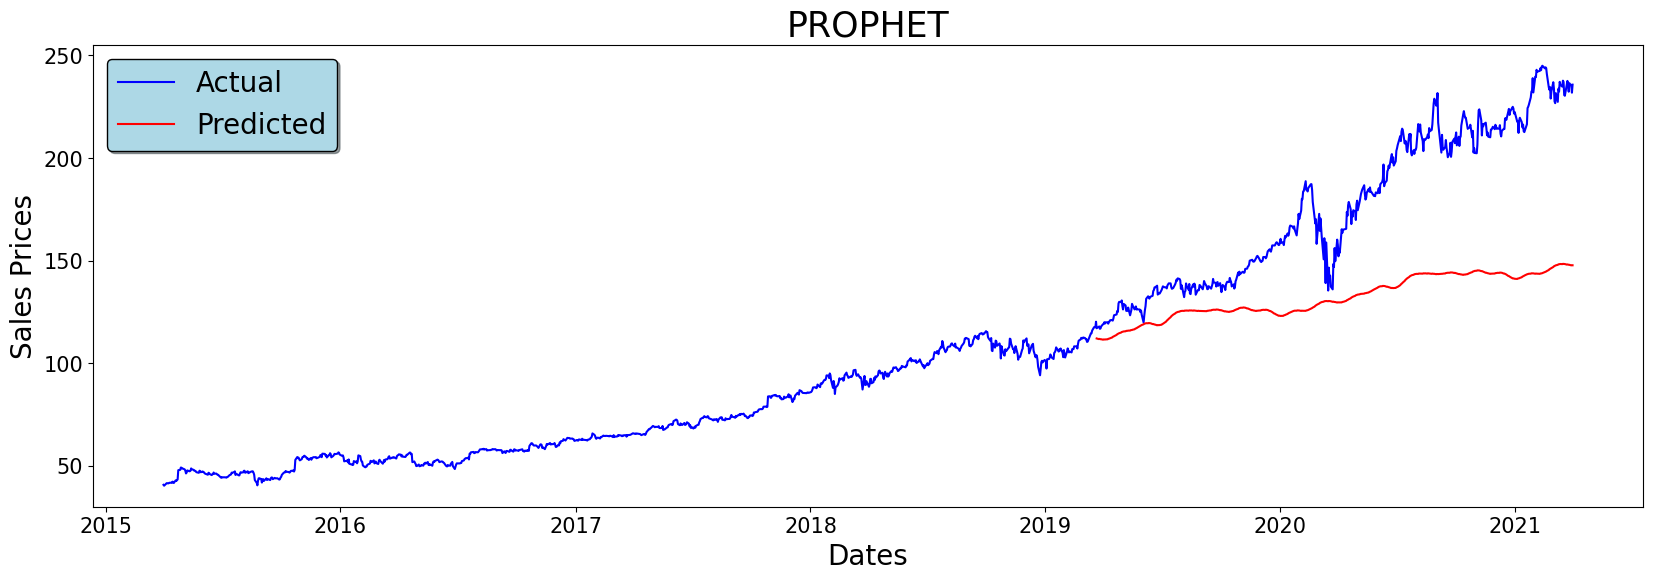

In [91]:

plt.figure(figsize=(20,6))  #full data and pred test


plt.plot(p['ds'],p['y'],label='Actual',color='blue')

plt.plot(prophet_predicted['ds'],prophet_predicted['yhat'],label='Predicted',color='red')

plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('PROPHET', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


In [92]:
y_true=prophet_test['y']
y_pred=prophet_predicted['yhat']

In [93]:
print("MSE:",mean_squared_error(y_true,y_pred))
print("MAE:",mean_absolute_error(y_true,y_pred))            #ACTUAL
print("RMSE:",np.sqrt(mean_squared_error(y_true,y_pred)))

MSE: 2703.9130203374602
MAE: 43.734324509408054
RMSE: 51.99916365036519


In [102]:
prophet_fit_forcsat=model_prohet.fit(p)
future_data = prophet_fit_forcsat.make_future_dataframe(periods=30, freq = 'W')
prophet_forecast = model_prohet.predict(future_data)
prophet_forecast[['ds','trend']].head()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp176wdfqv/berxag6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp176wdfqv/585s92eg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18021', 'data', 'file=/tmp/tmp176wdfqv/berxag6h.json', 'init=/tmp/tmp176wdfqv/585s92eg.json', 'output', 'file=/tmp/tmp176wdfqv/prophet_model4j7b1ddn/prophet_model-20250727122219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:22:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:22:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend
0,2015-04-01,43.146904
1,2015-04-02,43.161866
2,2015-04-06,43.221715
3,2015-04-07,43.236678
4,2015-04-08,43.251640


In [103]:
future_forcast=prophet_forecast[prophet_forecast['ds']>prophet_test['ds'].max()]
future_forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1511,2021-04-04,243.19931,231.456080,244.952115,243.199310,243.199310,-5.167035,-5.167035,-5.167035,-1.259518,-1.259518,-1.259518,-3.907517,-3.907517,-3.907517,0.0,0.0,0.0,238.032275
1512,2021-04-11,244.50378,234.649056,247.690311,244.503780,244.503780,-3.396845,-3.396845,-3.396845,-1.259518,-1.259518,-1.259518,-2.137327,-2.137327,-2.137327,0.0,0.0,0.0,241.106935
1513,2021-04-18,245.80825,237.332530,249.942732,245.798130,245.808250,-2.015912,-2.015912,-2.015912,-1.259518,-1.259518,-1.259518,-0.756395,-0.756395,-0.756395,0.0,0.0,0.0,243.792338
1514,2021-04-25,247.11272,239.329659,252.318531,247.059270,247.138644,-1.148952,-1.148952,-1.148952,-1.259518,-1.259518,-1.259518,0.110565,0.110565,0.110565,0.0,0.0,0.0,245.963768
1515,2021-05-02,248.41719,241.334396,253.805096,248.297063,248.482443,-0.736610,-0.736610,-0.736610,-1.259518,-1.259518,-1.259518,0.522907,0.522907,0.522907,0.0,0.0,0.0,247.680580


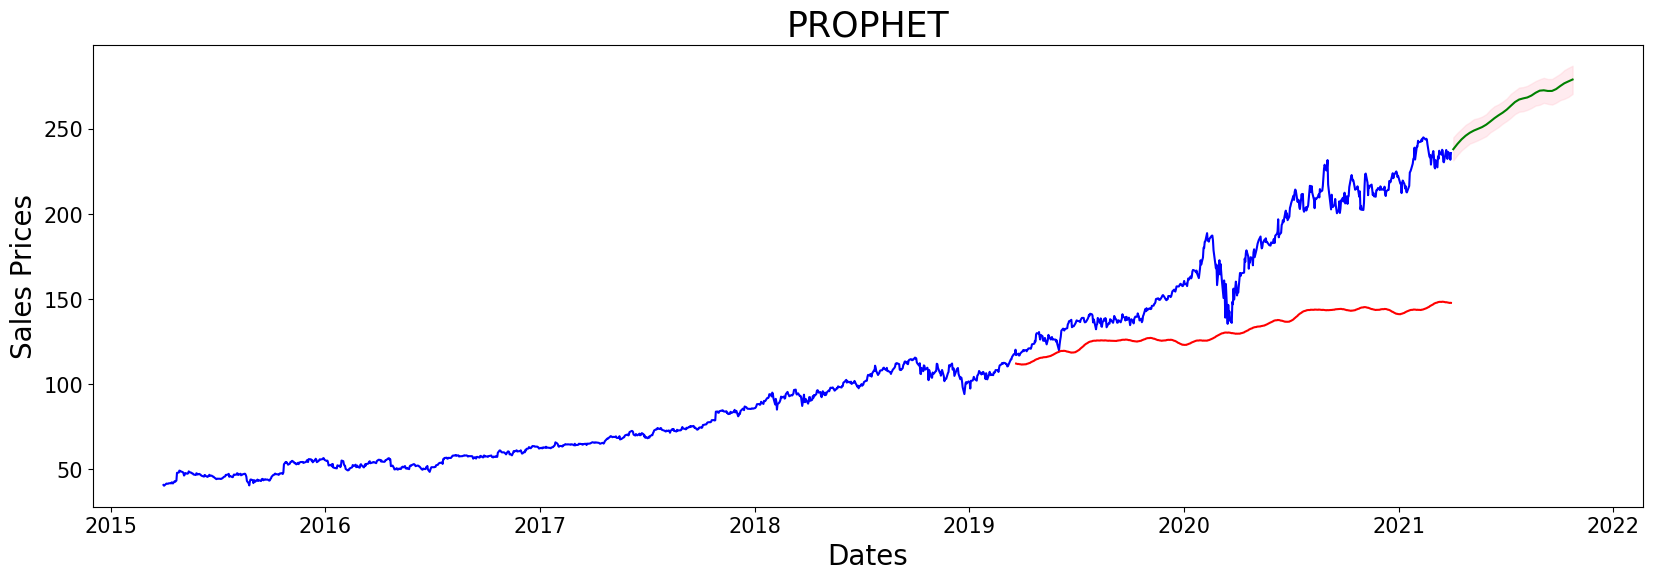

In [ ]:
plt.figure(figsize=(20,6))

plt.plot(p['ds'],p['y'],label='Actual',color='blue')

plt.plot(prophet_predicted['ds'],prophet_predicted['yhat'],label='Predicted',color='red')

plt.plot(future_forcast['ds'],future_forcast['yhat'],label='Predicted',color='green')

plt.fill_between(future_forcast['ds'],future_forcast['yhat_lower'],future_forcast['yhat_upper'],color='pink',alpha=0.3,label='confidence')

plt.legend(loc='upper left', fontsize = 10, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('PROPHET', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


